In [11]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv(r'C:\jintu\DATA\Formated data_resampled 15T MY\MY1 2023.csv')
df

,created_at,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-10 20:00:00,503372.0,23.385867,38.066724,442.508711,0.000000,30.0,67.285714,14.428571,15.571429
1,2023-01-10 20:15:00,503383.0,23.250297,35.728543,503.089431,0.000000,30.0,68.133333,16.933333,18.933333
2,2023-01-10 20:30:00,503398.0,27.758007,36.726547,950.243902,0.000000,30.0,68.400000,17.666667,19.066667
3,2023-01-10 20:45:00,503413.0,26.571767,35.528942,1119.024390,4.166667,30.0,68.933333,19.200000,20.400000
4,2023-01-10 21:00:00,503428.0,24.673784,35.928144,950.569106,0.694444,30.0,69.200000,18.133333,19.133333
...,...,...,...,...,...,...,...,...,...,...
14689,2023-06-12 20:15:00,684018.0,7.829181,12.375250,105.040650,38.888889,31.0,58.000000,8.200000,9.266667
14690,2023-06-12 20:30:00,684033.0,7.591934,10.778443,107.967480,38.194444,31.0,58.533333,8.400000,9.066667
14691,2023-06-12 20:45:00,684048.0,5.931198,9.580838,111.869919,37.268519,31.0,58.600000,8.266667,9.000000
14692,2023-06-12 21:00:00,684063.0,7.117438,11.177645,112.520325,39.814815,31.0,59.000000,8.733333,9.400000


In [13]:
start_date = '2023-03-07'
end_date   = '2023-04-14'

# Select DataFrame rows between two dates
mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
df2 = df.loc[mask]

In [14]:
df2

,created_at,id,field1,field2,field3,field4,field5,field6,field7,field8
5296,2023-03-07 00:00:00,580658.0,25.860024,32.534930,781.788618,0.0,29.000000,69.333333,39.733333,48.733333
5297,2023-03-07 00:15:00,580673.0,20.877817,27.345309,545.691057,0.0,29.000000,67.333333,38.200000,47.133333
5298,2023-03-07 00:30:00,580688.0,21.352313,29.740519,433.495935,0.0,28.400000,66.866667,36.600000,44.733333
5299,2023-03-07 00:45:00,580703.0,24.199288,31.536926,491.382114,0.0,28.000000,67.866667,36.800000,45.400000
5300,2023-03-07 01:00:00,580718.0,26.097272,31.536926,812.682927,0.0,28.666667,69.533333,37.133333,46.200000
...,...,...,...,...,...,...,...,...,...,...
8939,2023-04-13 22:45:00,635185.0,31.791222,40.518962,935.284553,0.0,29.000000,74.666667,39.466667,47.266667
8940,2023-04-13 23:00:00,635200.0,26.097272,38.522954,838.373984,0.0,29.000000,74.000000,42.066667,51.666667
8941,2023-04-13 23:15:00,635215.0,28.469751,35.728543,955.447154,0.0,29.000000,74.266667,38.666667,47.133333
8942,2023-04-13 23:30:00,635230.0,27.995255,36.526946,898.861789,0.0,29.000000,73.933333,38.733333,46.800000


<Axes: >

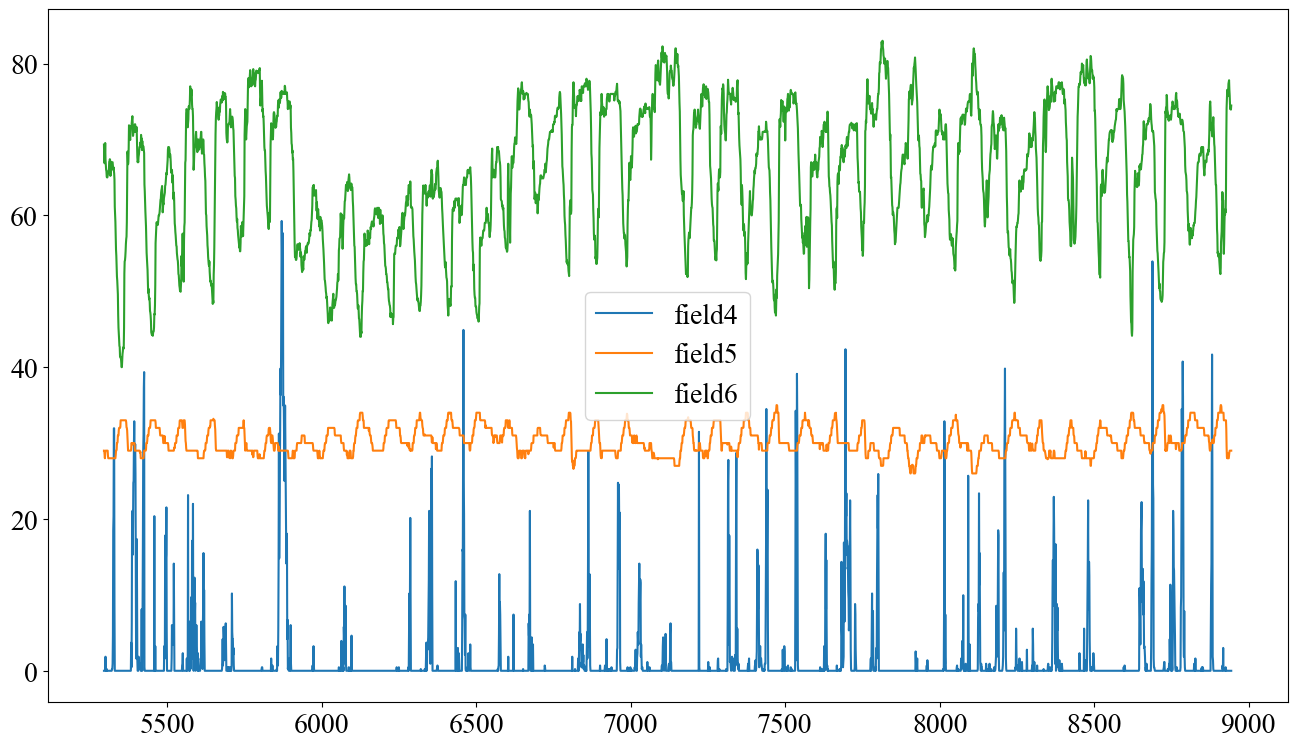

In [139]:
target = 'field4'
var = ['field4','field5','field6']
df2[var].plot(figsize=(16,9))

In [140]:
data = df2[var].reset_index(drop=True)
data

,field4,field5,field6
0,0.0,29.000000,69.333333
1,0.0,29.000000,67.333333
2,0.0,28.400000,66.866667
3,0.0,28.000000,67.866667
4,0.0,28.666667,69.533333
...,...,...,...
3643,0.0,29.000000,74.666667
3644,0.0,29.000000,74.000000
3645,0.0,29.000000,74.266667
3646,0.0,29.000000,73.933333


In [141]:
# Min-Max Normalization
df_norm = (data-data.min())/(data.max()-data.min())
#df_norm = pd.concat((df_norm, data.species), 1)
 
print("Scaled Dataset Using Pandas")
df_norm.head()

Scaled Dataset Using Pandas


,field4,field5,field6
0,0.0,0.333333,0.682171
1,0.0,0.333333,0.635659
2,0.0,0.266667,0.624806
3,0.0,0.222222,0.648062
4,0.0,0.296296,0.686822


In [142]:
values = data.values
n_train_hours = int((60/15)*24*31)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# print(len(values)
print(len(train))
print(len(test))

2976
672


In [143]:
n_val = len(train) - len(test)

# split into input and outputs
train_X, train_y = train[:n_val, 1:], train[:n_val, 0]
val_X, val_y = train[n_val:, 1:], train[n_val:,0]
test_X, test_y = test[:, 1:], test[:, 0]

In [144]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(2304, 1, 2) (2304,) (672, 1, 2) (672,) (672, 1, 2) (672,)


Epoch 1/60


C:\Users\Borah\.conda\envs\tf-gpu\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


576/576 - 1s - 2ms/step - loss: 1.7420 - val_loss: 1.7240
Epoch 2/60
576/576 - 0s - 648us/step - loss: 1.7198 - val_loss: 1.7081
Epoch 3/60
576/576 - 0s - 666us/step - loss: 1.7086 - val_loss: 1.7097
Epoch 4/60
576/576 - 0s - 676us/step - loss: 1.7065 - val_loss: 1.7080
Epoch 5/60
576/576 - 0s - 670us/step - loss: 1.7068 - val_loss: 1.7120
Epoch 6/60
576/576 - 0s - 690us/step - loss: 1.7106 - val_loss: 1.7074
Epoch 7/60
576/576 - 0s - 680us/step - loss: 1.7077 - val_loss: 1.7077
Epoch 8/60
576/576 - 0s - 696us/step - loss: 1.7071 - val_loss: 1.7071
Epoch 9/60
576/576 - 0s - 701us/step - loss: 1.7074 - val_loss: 1.7049
Epoch 10/60
576/576 - 0s - 697us/step - loss: 1.7056 - val_loss: 1.7053
Epoch 11/60
576/576 - 0s - 649us/step - loss: 1.7055 - val_loss: 1.7087
Epoch 12/60
576/576 - 0s - 648us/step - loss: 1.7047 - val_loss: 1.7045
Epoch 13/60
576/576 - 0s - 657us/step - loss: 1.7060 - val_loss: 1.7072
Epoch 14/60
576/576 - 0s - 647us/step - loss: 1.7044 - val_loss: 1.7058
Epoch 15/60
57

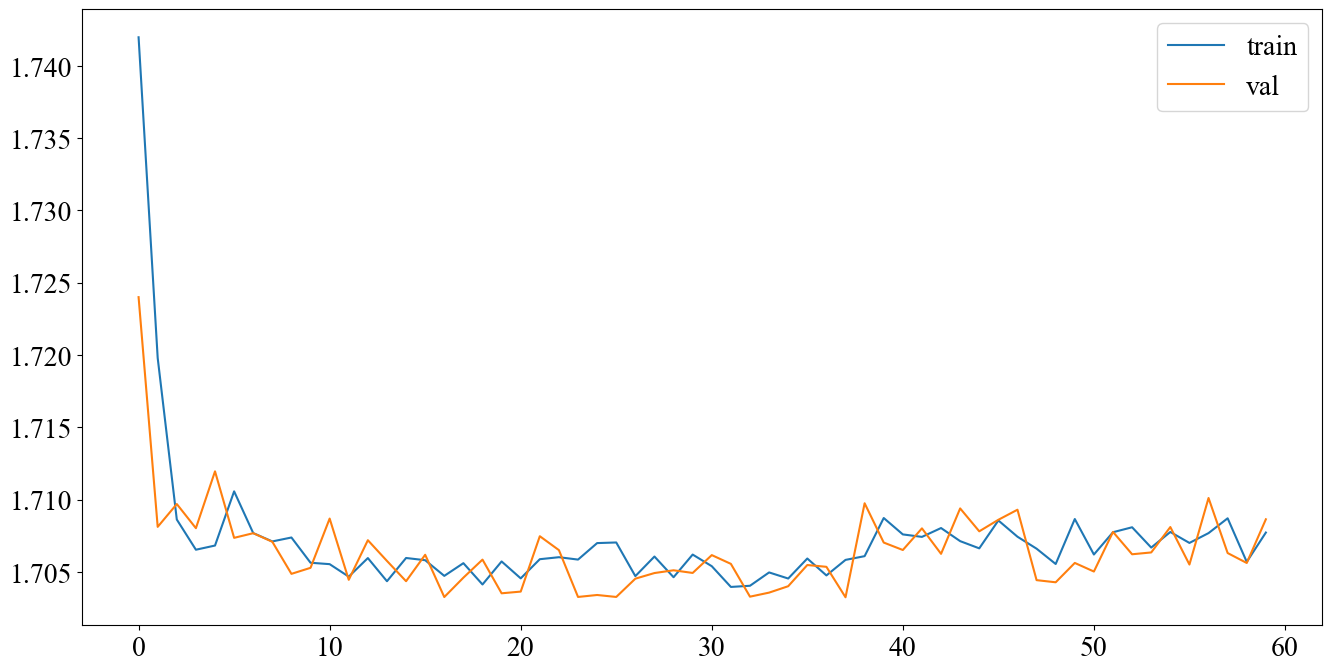

In [145]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=60, batch_size=4, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
fig = pyplot.figure()
fig.set_size_inches(16, 8)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [146]:
# make a prediction
yhat = model.predict(test_X)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step


In [147]:
test_X.shape

(672, 1, 2)

In [148]:
print(yhat.shape)
print(test_y.shape)

(672, 1)
(672,)


In [149]:
yhat[0]

array([0.0109179], dtype=float32)

In [150]:
yhat = yhat.reshape(test_y.shape)
yhat = (yhat*(data[target].max()-data[target].min())) + data[target].min()

In [151]:
print(yhat.shape)
print(test_y.shape)

(672,)
(672,)


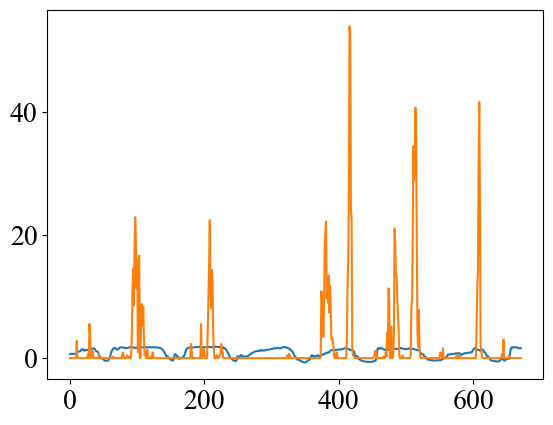

In [152]:
import matplotlib.pyplot as plt
plt.plot(yhat)
plt.plot(test_y)
plt.show()

In [153]:
test_y

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.23148148,
        2.77777778,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.23148148,  0.69444444,  0.        ,  5.55555556,
        3.47222222,  0.        ,  0.23148148,  0.23148148,  1.15740741,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.69444444,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.23148148,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [154]:
data

,field4,field5,field6
0,0.0,29.000000,69.333333
1,0.0,29.000000,67.333333
2,0.0,28.400000,66.866667
3,0.0,28.000000,67.866667
4,0.0,28.666667,69.533333
...,...,...,...
3643,0.0,29.000000,74.666667
3644,0.0,29.000000,74.000000
3645,0.0,29.000000,74.266667
3646,0.0,29.000000,73.933333


In [155]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
# dataset = read_csv('f.csv', header=0, index_col=0)
values = data.values
# integer encode direction
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])
# ensure all data is float
np.delete(values,0,0)
values = DataFrame(values)
values = values.iloc[:]
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var1(t)   var2(t)   var3(t)
1        0.0   0.333333   0.662544  0.00000  0.333333  0.606007
2        0.0   0.333333   0.606007  0.00000  0.266667  0.593640
3        0.0   0.266667   0.593640  0.00000  0.222222  0.620141
4        0.0   0.222222   0.620141  0.00000  0.296296  0.669611
5        0.0   0.296296   0.669611  0.03125  0.333333  0.606007


In [156]:
# split into train and test sets
values = reframed.values
n_train_hours = int((60/15)*24*31)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# print(len(values)
print(len(train))
print(len(test))

2976
671


In [157]:
n_val = len(train)-len(test)

# split into input and outputs
train_X, train_y = train[:n_val, :], train[:n_val, 0]
val_X, val_y = train[n_val:, :], train[n_val:,0]
test_X, test_y = test[:, ], test[:, 0]
print(type(test_X))

<class 'numpy.ndarray'>


In [158]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(2305, 1, 6) (2305,) (671, 1, 6) (671,) (671, 1, 6) (671,)


Epoch 1/15


C:\Users\Borah\.conda\envs\tf-gpu\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 1s - 35ms/step - loss: 0.0359 - val_loss: 0.0283
Epoch 2/15
25/25 - 0s - 2ms/step - loss: 0.0286 - val_loss: 0.0251
Epoch 3/15
25/25 - 0s - 2ms/step - loss: 0.0241 - val_loss: 0.0232
Epoch 4/15
25/25 - 0s - 2ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 5/15
25/25 - 0s - 2ms/step - loss: 0.0208 - val_loss: 0.0189
Epoch 6/15
25/25 - 0s - 2ms/step - loss: 0.0180 - val_loss: 0.0167
Epoch 7/15
25/25 - 0s - 2ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 8/15
25/25 - 0s - 2ms/step - loss: 0.0136 - val_loss: 0.0124
Epoch 9/15
25/25 - 0s - 2ms/step - loss: 0.0111 - val_loss: 0.0123
Epoch 10/15
25/25 - 0s - 2ms/step - loss: 0.0102 - val_loss: 0.0109
Epoch 11/15
25/25 - 0s - 2ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 12/15
25/25 - 0s - 2ms/step - loss: 0.0084 - val_loss: 0.0097
Epoch 13/15
25/25 - 0s - 2ms/step - loss: 0.0085 - val_loss: 0.0086
Epoch 14/15
25/25 - 0s - 2ms/step - loss: 0.0080 - val_loss: 0.0078
Epoch 15/15
25/25 - 0s - 2ms/step - loss: 0.0072 - val_loss: 0.0073

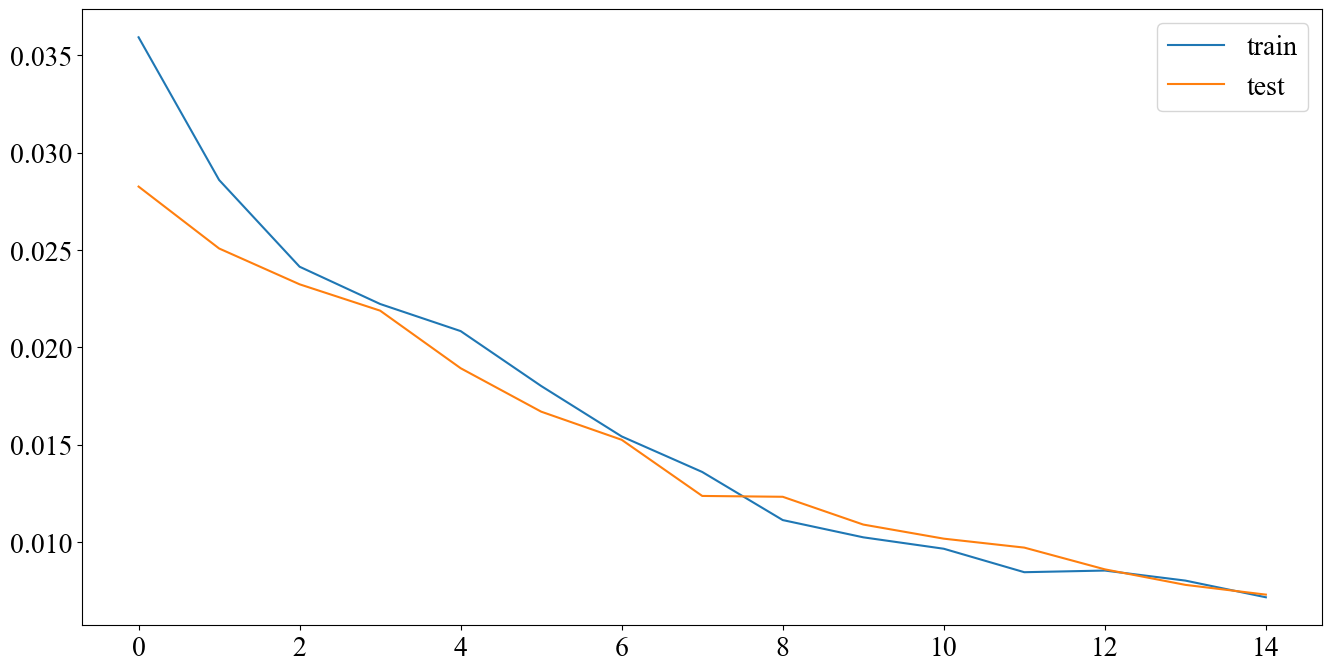

In [159]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=15, batch_size=96, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
fig = pyplot.figure()
fig.set_size_inches(16, 8)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [160]:
# make a prediction
yhat = model.predict(test_X)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [161]:
yhat = yhat.reshape(test_y.shape)

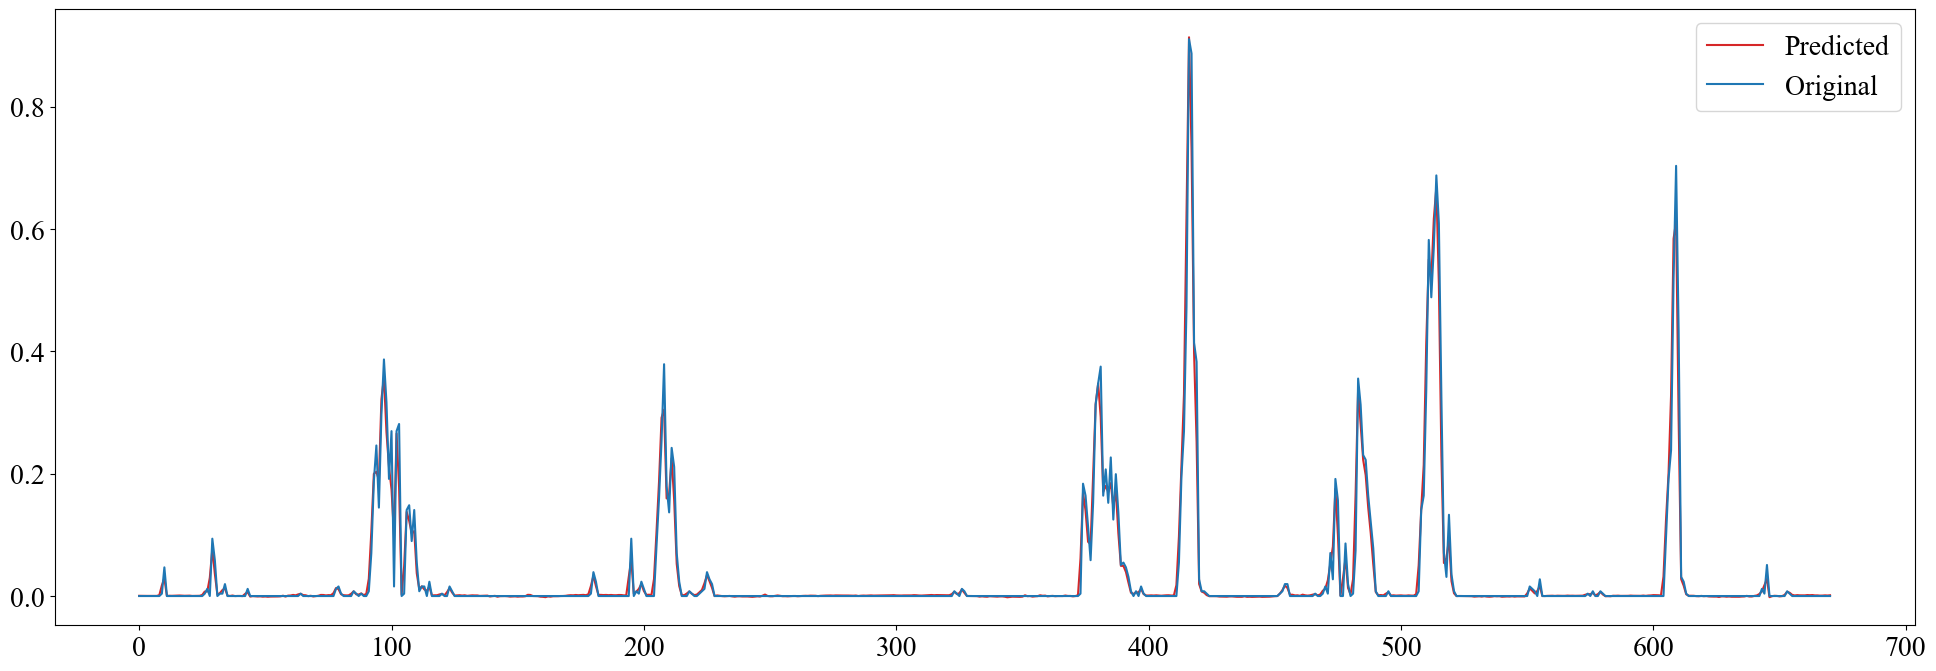

<Figure size 100x100 with 0 Axes>

<Figure size 100x100 with 0 Axes>

In [162]:
fig = pyplot.figure()
 
fig.set_size_inches(24, 8)
pyplot.plot(yhat,color="tab:red")
pyplot.plot(test_y,color="tab:blue")
pyplot.legend(['Predicted','Original'])
pyplot.show()
pyplot.figure(figsize=(1,1))

In [163]:
#target = 'field8'

yhat1 = yhat.reshape(test_y.shape)
yhat1 = (yhat*(data[target].max()-data[target].min())) + data[target].min()
test_y1 = (test_y*(data[target].max()-data[target].min())) + data[target].min()

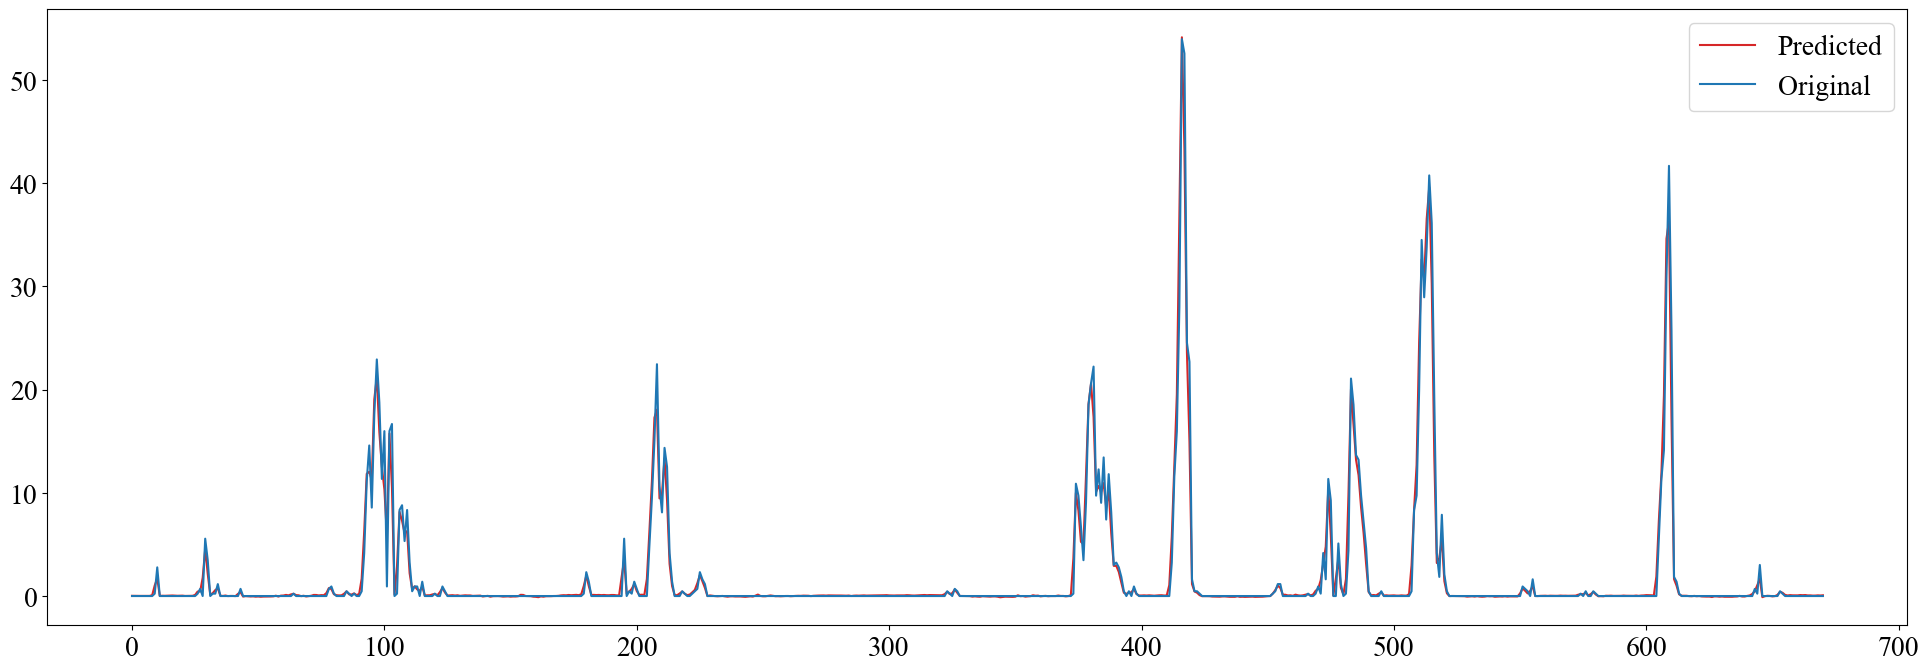

<Figure size 100x100 with 0 Axes>

<Figure size 100x100 with 0 Axes>

In [164]:
fig = pyplot.figure()
 
fig.set_size_inches(24, 8)
pyplot.plot(yhat1,color="tab:red")
pyplot.plot(test_y1,color="tab:blue")
pyplot.legend(['Predicted','Original'])
pyplot.show()
pyplot.figure(figsize=(1,1))

In [165]:
rmse = sqrt(mean_squared_error(yhat1, test_y1))
print('Test RMSE: %.3f' % rmse)
from sklearn.metrics import r2_score
r2Score = r2_score(yhat1, test_y1)
print('R2 Score:%.3f'%r2Score)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yhat1, test_y1)
print('Mean Absolute Error:%.3f'%mae)

Test RMSE: 1.148
R2 Score:0.961
Mean Absolute Error:0.401


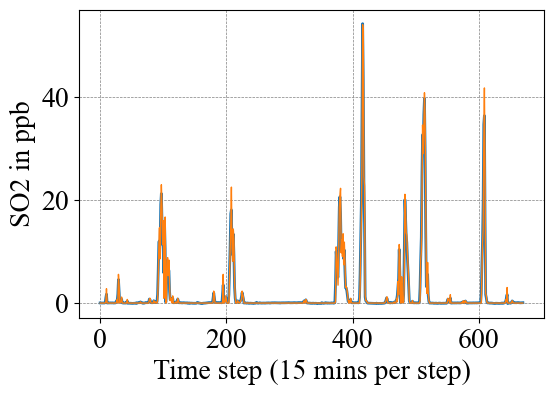

In [166]:
ylabels = 'SO2 in ppb'#'PM2.5 in µg/m³'#

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
df = pd.DataFrame(data={'Predictions':yhat1, 'Actuals':test_y1})
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(6, 4))
plt.plot(df['Predictions'], linestyle='solid', marker='', linewidth=2)
plt.plot(df['Actuals'], linestyle='solid', linewidth=1)
plt.xlabel('Time step (15 mins per step)')
plt.ylabel(ylabels)
#plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

#plt.savefig(r'C:\jintu\DATA\Formated data_resampled 15T MY\PM2.5.png', bbox_inches='tight')
plt.show()

In [167]:
yhat1

array([ 2.24096999e-02,  1.64108612e-02,  1.18995812e-02,  1.32667106e-02,
        9.72027890e-03,  1.59998629e-02,  1.32667106e-02,  1.32667106e-02,
        8.87223035e-02,  1.02834547e+00,  1.71636581e+00,  1.27671510e-02,
        2.83602085e-02,  2.30030343e-02,  3.18069272e-02,  3.46517675e-02,
        5.22193797e-02,  4.02757116e-02,  2.57442817e-02,  3.54463160e-02,
        3.81245650e-02,  1.07308794e-02,  1.91745125e-02,  1.84942186e-02,
        2.27059908e-02,  1.08746961e-01,  4.37037259e-01,  4.42820817e-01,
        1.76723623e+00,  4.53908491e+00,  2.15142179e+00,  1.33372441e-01,
        2.83950835e-01,  5.77755034e-01,  7.45272458e-01,  4.43563275e-02,
        8.21979903e-03,  4.87252362e-02, -3.45811620e-03,  9.04486887e-03,
        9.83396731e-03, -6.86682574e-03,  2.10590407e-01,  3.74259353e-01,
       -5.19114658e-02, -7.71151483e-03, -2.40665879e-02, -4.27789278e-02,
       -3.00668031e-02, -6.19957410e-02, -4.46205176e-02, -7.05998093e-02,
       -5.21400869e-02, -

In [168]:
test_y1

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.23148148,
        2.7777777 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.23148148,  0.6944444 ,  0.        ,  5.5555553 ,
        3.4722223 ,  0.        ,  0.23148148,  0.23148148,  1.1574074 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.6944444 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.23148148,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  